#Instalação e importação das bibliotecas

In [27]:
# ------------------------------------------------------------------------------
# Rota Inteligente - Sabor Express
# Parte 1: Instalação e Importação das Bibliotecas
# ------------------------------------------------------------------------------

# Instalar bibliotecas
!pip install numpy pandas scikit-learn networkx matplotlib tqdm --quiet

# Importar as bibliotecas
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Configuração visual (Para deixar bonito)
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

print("Bibliotecas instaladas e importadas")


Bibliotecas instaladas e importadas


#Carregamento dos Dados e Visualização do Grafo

O que essa célula faz

Lê os CSVs com os dados de nós, arestas e pedidos.

Cria o grafo G com networkx.

Mostra o número total de nós e arestas.

Gera um mapa visual com os bairros conectados e os tempos de deslocamento.

Dados carregados com sucesso!

Nós (bairros/pontos):


,node_id,x,y,area
0,1,0.0,0.0,Rodovia Central
1,2,-1.5,0.0,Rodovia Central
2,3,1.5,0.0,Rodovia Central
3,4,-2.0,0.0,Rodovia Central
4,5,2.0,0.0,Rodovia Central



Arestas (conexões entre pontos):


,u,v,distance_km,time_min
0,1,58.0,1.0,3.0
1,58,2.0,0.5,1.5
2,1,59.0,1.0,3.0
3,59,3.0,0.5,1.5
4,2,4.0,0.5,1.5



Pedidos (entregas):


,order_id,node_id,time_request
0,1001,15,11:03
1,1002,3,11:09
2,1003,28,11:15
3,1004,5,11:21
4,1006,1,11:34



 Grafo criado com 60 nós e 99 arestas.


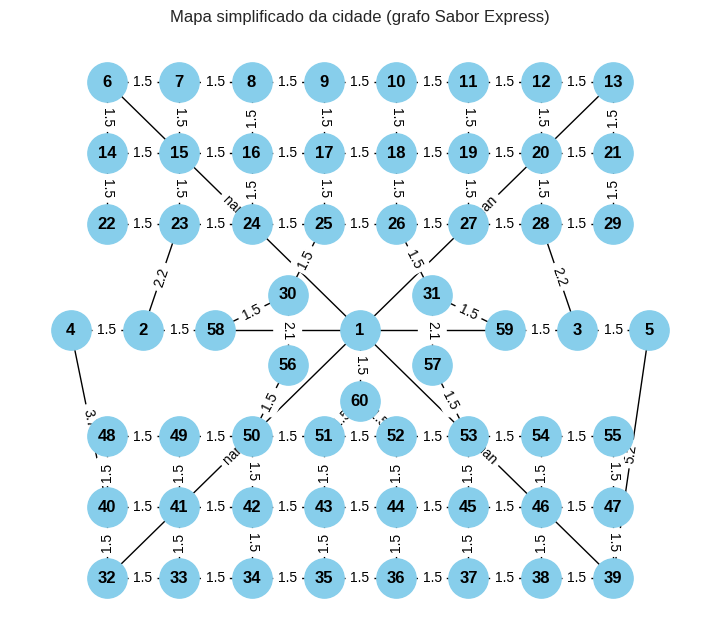

In [28]:
# ------------------------------------------------------------------------------
# Carregamento dos dados e criação do grafo
# ------------------------------------------------------------------------------

# Caminhos dos arquivos CSV
path_nodes = "data/nodes.csv"
path_edges = "data/graph_edges.csv"
path_orders = "data/orders.csv"

# Aqui carrega os CSVs
nodes_df = pd.read_csv(path_nodes)
edges_df = pd.read_csv(path_edges)
orders_df = pd.read_csv(path_orders)

print("Dados carregados com sucesso!")
print("\nNós (bairros/pontos):")
display(nodes_df.head())

print("\nArestas (conexões entre pontos):")
display(edges_df.head())

print("\nPedidos (entregas):")
display(orders_df.head())

# Criar grafo com NetworkX
G = nx.Graph()

# Adicionar nós (com coordenadas)
for _, row in nodes_df.iterrows():
    G.add_node(int(row["node_id"]), pos=(row["x"], row["y"]))

# Adicionar arestas (com peso = tempo em minutos)
for _, row in edges_df.iterrows():
    G.add_edge(int(row["u"]), int(row["v"]), weight=float(row["time_min"]))

print(f"\n Grafo criado com {len(G.nodes())} nós e {len(G.edges())} arestas.")

# Plotar grafo
pos = nx.get_node_attributes(G, "pos")
plt.figure(figsize=(7,6)) # se quiser pode mudar o tamanho do mapa (em polegadas) recomendo 14,12 ou 7,6
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=800, font_weight="bold")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Mapa simplificado da cidade (grafo Sabor Express)")
plt.show()


#Implementação do A*

In [29]:
# ------------------------------------------------------------------------------
# Implementando do Algoritmo A*
# ------------------------------------------------------------------------------

import heapq
import math

# Função heurística: distância entre dois nós
def heuristic(a, b, G):
    pos = nx.get_node_attributes(G, "pos")
    (x1, y1) = pos[a]
    (x2, y2) = pos[b]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Implementação do algoritmo A*
def astar_search(G, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))

    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        _, current = heapq.heappop(frontier)

        if current == goal:
            break

        for neighbor in G.neighbors(current):
            weight = G[current][neighbor]["weight"]
            new_cost = cost_so_far[current] + weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal, G)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current

    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    path.reverse()

    return path, cost_so_far[goal]

def plot_path(G, path, title="Rota encontrada"):
    pos = nx.get_node_attributes(G, "pos")
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), width=3, edge_color="red")
    plt.title(title)
    plt.show()


#Téste do A*

téste basico para ver se está tudo certo.

Rota encontrada da Loja (45) até o endereço 12: [45, 53, 57, 31, 26, 18, 19, 20, 12]
Tempo total estimado: 12.60 minutos


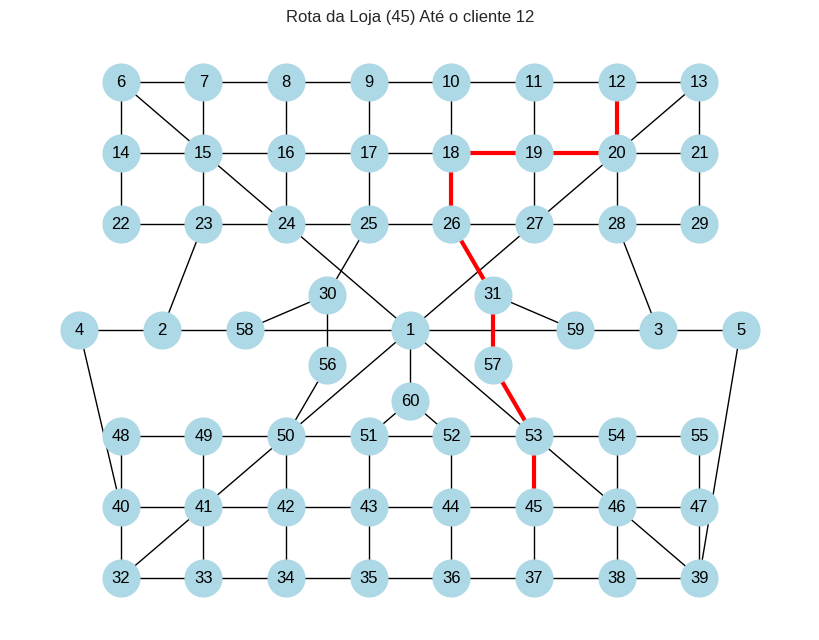

In [30]:
# ------------------------------------------------------------------------------
# Teste do A* (da loja até um cliente)
# ------------------------------------------------------------------------------

# A loja está no endereço 45
start_node = 45
goal_node = 12  # Aqui o endereço do cliente

path, cost = astar_search(G, start_node, goal_node)

print(f"Rota encontrada da Loja (45) até o endereço {goal_node}: {path}")
print(f"Tempo total estimado: {cost:.2f} minutos")

plot_path(G, path, title=f"Rota da Loja (45) Até o cliente {goal_node}")


# Pondo em prática o algoritimo A*

Selecione o cenário:
1 - Mapa normal
2 - Mapa com trânsito pesado
Digite 1 ou 2: 1
Carregando grafo normal...
Grafo carregado: 60 pontos e 99 conexões.
Digite o ID da loja (padrão = 45): 45
Digite os IDs dos clientes (separados por vírgula): 22

 Loja: 45
 Entregas: [22]

 Melhor sequência de entregas encontrada:
45 → 22

 Tempo total estimado da rota completa: 12.60 minutos

📊 Relatório de Entregas:


,Origem,Destino,Tempo (min),Tempo acumulado (min),Satisfação do Cliente
0,45,22,12.6,12.6,Bom 🙂


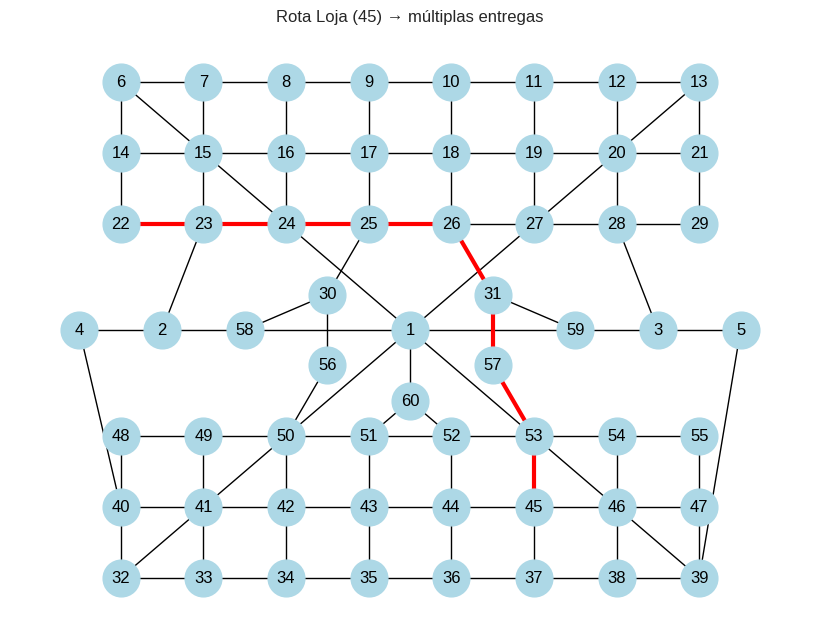

In [31]:
# ------------------------------------------------------------------------------
# A* múltiplas entregas com relatório de satisfação
# ------------------------------------------------------------------------------

import pandas as pd
import networkx as nx
from itertools import permutations

# Escolher qual grafo carregar (Horario normal ou de pico)
print("Selecione o cenário:")
print("1 - Mapa normal")
print("2 - Mapa com trânsito pesado")

choice = input("Digite 1 ou 2: ").strip()

if choice == "2":
    edges_path = "data/graph_edges_transito.csv"
    print("Carregando grafo com trânsito pesado...")
else:
    edges_path = "data/graph_edges.csv"
    print("Carregando grafo normal...")

# mostra o grafo
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv("data/nodes.csv")

G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(int(row["node_id"]), pos=(row["x"], row["y"]))
for _, row in edges_df.iterrows():
    G.add_edge(int(row["u"]), int(row["v"]), weight=float(row["time_min"]))

print(f"Grafo carregado: {len(G.nodes())} pontos e {len(G.edges())} conexões.")

# Escolher origem e destinos
start_node = int(input("Digite o ID da loja (padrão = 45): ") or 45)
destinos_input = input("Digite os IDs dos clientes (separados por vírgula): ")
destinos = [int(x.strip()) for x in destinos_input.split(",")]

print(f"\n Loja: {start_node}")
print(f" Entregas: {destinos}")

# ------------------------------------------------------------------------------
# Custo e caminho entre dois nós
def rota_custo(G, origem, destino):
    path, cost = astar_search(G, origem, destino)
    return cost, path

# Satisfação dos clientes
def satisfacao_cliente(tempo):
    if tempo <= 10:
        return "Excelente 😀"
    elif tempo <= 20:
        return "Bom 🙂"
    elif tempo <= 30:
        return "Aceitável 😐"
    else:
        return "Ruim 😞"

# ------------------------------------------------------------------------------
# Encontrar melhor sequência
melhor_rota = None
menor_custo = float("inf")
melhor_permutacao = None

for perm in permutations(destinos):
    rota_temp = [start_node] + list(perm)
    custo_total = 0
    for i in range(len(rota_temp) - 1):
        cost, _ = rota_custo(G, rota_temp[i], rota_temp[i+1])
        custo_total += cost
    if custo_total < menor_custo:
        menor_custo = custo_total
        melhor_permutacao = rota_temp

# ------------------------------------------------------------------------------
# Gerar relatório
print("\n Melhor sequência de entregas encontrada:")
print(" → ".join(map(str, melhor_permutacao)))
print(f"\n Tempo total estimado da rota completa: {menor_custo:.2f} minutos")

relatorio = []
tempo_acumulado = 0
for i in range(len(melhor_permutacao) - 1):
    origem = melhor_permutacao[i]
    destino = melhor_permutacao[i+1]
    cost, path = rota_custo(G, origem, destino)
    tempo_acumulado += cost
    relatorio.append({
        "Origem": origem,
        "Destino": destino,
        "Tempo (min)": round(cost, 2),
        "Tempo acumulado (min)": round(tempo_acumulado, 2),
        "Satisfação do Cliente": satisfacao_cliente(tempo_acumulado)
    })

relatorio_df = pd.DataFrame(relatorio)
print("\n📊 Relatório de Entregas:")
display(relatorio_df)

# ------------------------------------------------------------------------------
# Plotar o caminho completo
caminho_total = []
for i in range(len(melhor_permutacao) - 1):
    _, path = rota_custo(G, melhor_permutacao[i], melhor_permutacao[i+1])
    caminho_total.extend(path[:-1])
caminho_total.append(melhor_permutacao[-1])

plot_path(G, caminho_total, title=f"Rota Loja ({start_node}) → múltiplas entregas")


# Agrupamento de entregas com o K-Means (Zonas de entrega)

Selecione o cenário:
1 - Mapa normal
2 - Mapa com trânsito pesado
Digite 1 ou 2: 1
Carregando grafo normal...
Grafo limpo: 60 nós e 95 arestas.


Calculando distâncias reais...: 100%|██████████| 22/22 [00:00<00:00, 2281.32it/s]


Quantos clusters (entregadores) deseja simular? (ex: 3): 3

 Entregas agrupadas por zonas (baseadas no grafo real):


,Cluster,Qtd_Entregas
0,0,6
1,1,11
2,2,7


/tmp/ipython-input-3697281332.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", k)


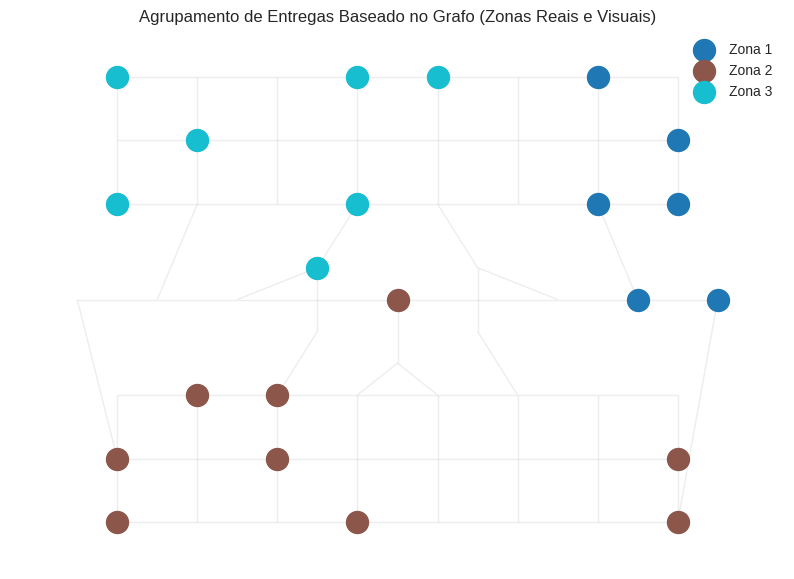

In [32]:
# ------------------------------------------------------------------------------
# Clustering baseado no grafo
# ------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from tqdm import tqdm
import matplotlib.pyplot as plt

# Escolher cenário
print("Selecione o cenário:")
print("1 - Mapa normal")
print("2 - Mapa com trânsito pesado")
choice = input("Digite 1 ou 2: ").strip()

if choice == "2":
    edges_path = "data/graph_edges_transito.csv"
    print("Carregando grafo com trânsito pesado...")
else:
    edges_path = "data/graph_edges.csv"
    print("Carregando grafo normal...")

# Mostrar o grafo
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv("data/nodes.csv")
orders_df = pd.read_csv("data/orders.csv")

edges_df = edges_df.drop_duplicates(subset=["u", "v"])
edges_df = edges_df[edges_df["time_min"] > 0]

G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(int(row["node_id"]), pos=(row["x"], row["y"]))
for _, row in edges_df.iterrows():
    u, v, w = int(row["u"]), int(row["v"]), float(row["time_min"])
    if G.has_edge(u, v):
        if w < G[u][v]["weight"]:
            G[u][v]["weight"] = w
    else:
        G.add_edge(u, v, weight=w)

print(f"Grafo limpo: {len(G.nodes())} nós e {len(G.edges())} arestas.")

# Pegar os nós com entregas
entregas = orders_df["node_id"].unique().tolist()

# Calcular matriz de distâncias
dist_matrix = np.zeros((len(entregas), len(entregas)))

for i, a in enumerate(tqdm(entregas, desc="Calculando distâncias reais...")):
    try:
        lengths = nx.single_source_dijkstra_path_length(G, a, weight='weight')
        for j, b in enumerate(entregas):
            dist_matrix[i, j] = lengths.get(b, np.inf)
    except Exception as e:
        print(f"Erro no nó {a}: {e}")
        dist_matrix[i, :] = np.inf

# Substituir np.inf por valor máximo plausível (para o MDS não colapsar)
max_dist = np.nanmax(dist_matrix[dist_matrix != np.inf])
dist_matrix[dist_matrix == np.inf] = max_dist * 1.5

# Número de clusters
k = int(input("Quantos clusters (entregadores) deseja simular? (ex: 3): ") or 3)

# Aplicar MDS e K-Means
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
X_mds = mds.fit_transform(dist_matrix)

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_mds)

# Associar cluster aos pedidos
cluster_df = pd.DataFrame({"node_id": entregas, "cluster": labels})
orders_clustered = pd.merge(orders_df, cluster_df, on="node_id", how="left")

# Mostrar resumo
summary = orders_clustered.groupby("cluster")["order_id"].count().reset_index()
summary.columns = ["Cluster", "Qtd_Entregas"]
print("\n Entregas agrupadas por zonas (baseadas no grafo real):")
display(summary)

# Plotar clusters no grafo real
plt.figure(figsize=(10,7))
pos = nx.get_node_attributes(G, "pos")

# Fundo (todas as ruas)
nx.draw_networkx_edges(G, pos, edge_color="lightgray", alpha=0.4)

# Paleta de cores variada
colors = plt.cm.get_cmap("tab10", k)

for c in range(k):
    cluster_nodes = cluster_df[cluster_df["cluster"] == c]["node_id"].tolist()
    nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes,
                           node_color=[colors(c)], node_size=250, label=f"Zona {c+1}")

plt.legend()
plt.title("Agrupamento de Entregas Baseado no Grafo (Zonas Reais e Visuais)")
plt.axis("off")
plt.show()


# A* + K-means (melhores rotas)


🚚 Calculando rotas heurísticas (rápidas) por cluster...

🗺️ Cluster 0 → 12 entregas
  Tempo total estimado: 19.30 min


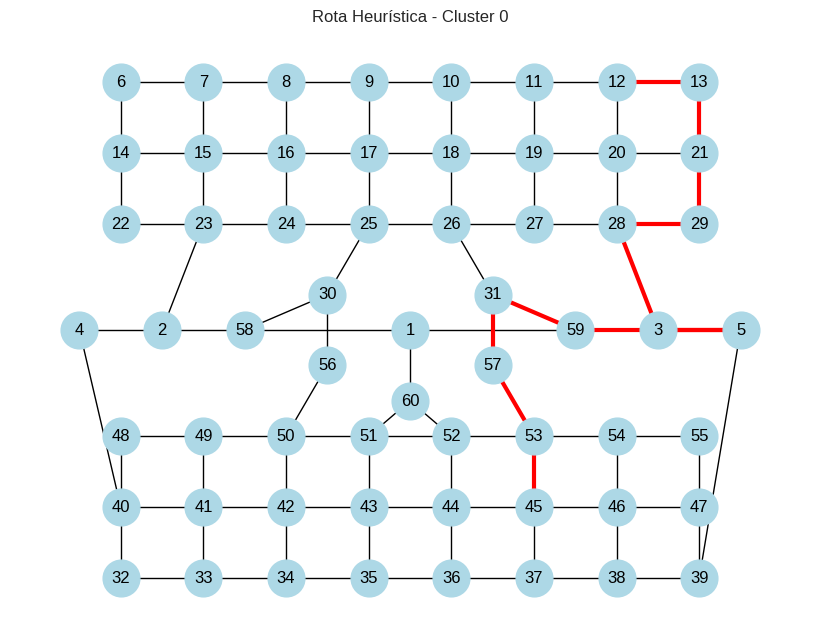


🗺️ Cluster 1 → 21 entregas
  Tempo total estimado: 31.50 min


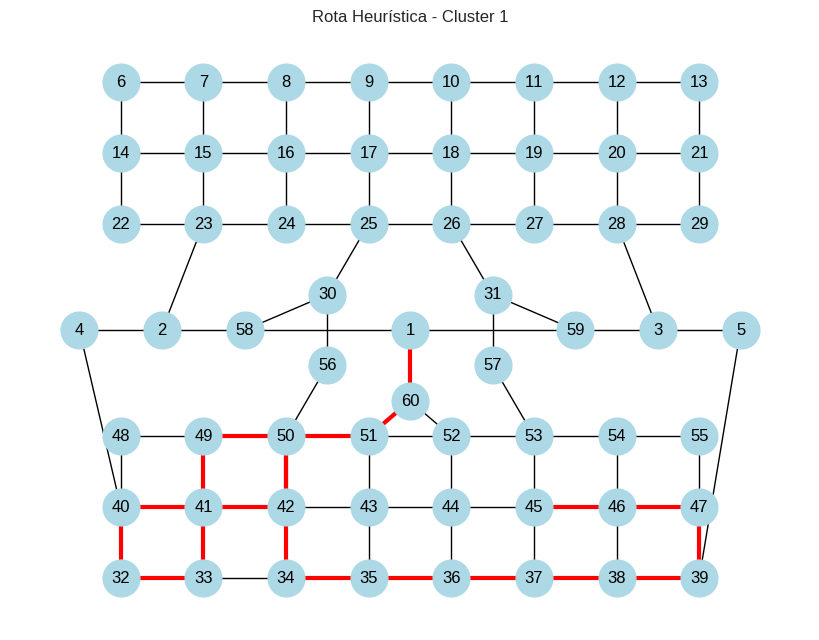


🗺️ Cluster 2 → 18 entregas
  Tempo total estimado: 27.60 min


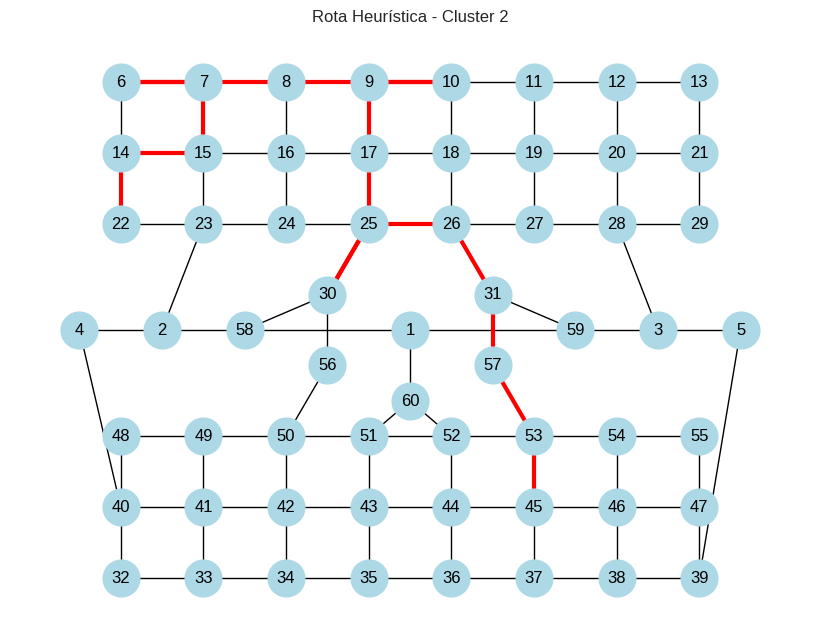

In [33]:
# ------------------------------------------------------------------------------
# Rotas rápidas por cluster com heurística
# ------------------------------------------------------------------------------

def rota_gulosa(G, start, entregas):
    """Calcula uma rota simples sempre indo ao ponto mais próximo disponível."""
    nao_visitados = set(entregas)
    atual = start
    rota = [start]
    total_cost = 0

    while nao_visitados:
        menor_dist = float("inf")
        proximo = None

        for destino in nao_visitados:
            try:
                _, cost = astar_search(G, atual, destino)
                if cost < menor_dist:
                    menor_dist = cost
                    proximo = destino
            except:
                continue

        if proximo is None:
            break  # se não tem caminho disponível

        # adicionar o caminho e custo
        path, cost = astar_search(G, atual, proximo)
        rota += path[1:]  # evita repetir nó atual
        total_cost += cost
        nao_visitados.remove(proximo)
        atual = proximo

    return rota, total_cost


# ------------------------------------------------------------------------------
# Execução por cluster
# ------------------------------------------------------------------------------
print("\n🚚 Calculando rotas heurísticas (rápidas) por cluster...")

melhores_rotas = {}

for c in sorted(orders_clustered["cluster"].unique()):
    entregas_cluster = orders_clustered[orders_clustered["cluster"] == c]["node_id"].unique().tolist()
    rota, custo = rota_gulosa(G, 45, entregas_cluster)
    melhores_rotas[c] = {"rota": rota, "tempo_total": custo}

# ------------------------------------------------------------------------------
# Exibir dos resultados
# ------------------------------------------------------------------------------
for c, info in melhores_rotas.items():
    print(f"\n🗺️ Cluster {c} → {len(info['rota'])-1} entregas")
    print(f"  Tempo total estimado: {info['tempo_total']:.2f} min")
    plot_path(G, info["rota"], title=f"Rota Heurística - Cluster {c}")


# Relatorio de entrega por entregador/cluster


In [34]:
# ------------------------------------------------------------------------------
# Parte 4.3: Relatório de Entregas por Cluster
# ------------------------------------------------------------------------------

import pandas as pd

def calcular_satisfacao(tempo):
    """Classifica satisfação com base no tempo gasto."""
    if tempo <= 15:
        return "Ótimo 😄"
    elif tempo <= 25:
        return "Bom 🙂"
    elif tempo <= 40:
        return "Aceitável 😐"
    else:
        return "Ruim 😣"


# ------------------------------------------------------------------------------
# Gera relatórios detalhados
# ------------------------------------------------------------------------------
relatorios = []

for c, info in melhores_rotas.items():
    rota = info["rota"]
    total_cluster = 0
    linhas = []

    for i in range(len(rota) - 1):
        origem = rota[i]
        destino = rota[i + 1]

        # tempo entre origem e destino (via A*)
        _, tempo = astar_search(G, origem, destino)
        total_cluster += tempo

        linhas.append({
            "Cluster": c,
            "Origem": origem,
            "Destino": destino,
            "Tempo (min)": round(tempo, 1),
            "Tempo acumulado (min)": round(total_cluster, 1),
            "Satisfação do Cliente": calcular_satisfacao(total_cluster)
        })

    df_cluster = pd.DataFrame(linhas)
    relatorios.append(df_cluster)

    print(f"\n📦 Relatório de Entregas — Cluster {c}")
    display(df_cluster)
    print(f"⏱️ Tempo total da rota: {round(total_cluster,1)} min")

# Juntar todos os relatórios (se quiser exportar depois)
relatorio_final = pd.concat(relatorios, ignore_index=True)



📦 Relatório de Entregas — Cluster 0


,Cluster,Origem,Destino,Tempo (min),Tempo acumulado (min),Satisfação do Cliente
0,0,45,53,1.5,1.5,Ótimo 😄
1,0,53,57,1.5,3.0,Ótimo 😄
2,0,57,31,2.1,5.1,Ótimo 😄
3,0,31,59,1.5,6.6,Ótimo 😄
4,0,59,3,1.5,8.1,Ótimo 😄
5,0,3,5,1.5,9.6,Ótimo 😄
6,0,5,3,1.5,11.1,Ótimo 😄
7,0,3,28,2.2,13.3,Ótimo 😄
8,0,28,29,1.5,14.8,Ótimo 😄
9,0,29,21,1.5,16.3,Bom 🙂


⏱️ Tempo total da rota: 19.3 min

📦 Relatório de Entregas — Cluster 1


,Cluster,Origem,Destino,Tempo (min),Tempo acumulado (min),Satisfação do Cliente
0,1,45,46,1.5,1.5,Ótimo 😄
1,1,46,47,1.5,3.0,Ótimo 😄
2,1,47,39,1.5,4.5,Ótimo 😄
3,1,39,38,1.5,6.0,Ótimo 😄
4,1,38,37,1.5,7.5,Ótimo 😄
5,1,37,36,1.5,9.0,Ótimo 😄
6,1,36,35,1.5,10.5,Ótimo 😄
7,1,35,34,1.5,12.0,Ótimo 😄
8,1,34,42,1.5,13.5,Ótimo 😄
9,1,42,50,1.5,15.0,Ótimo 😄


⏱️ Tempo total da rota: 31.5 min

📦 Relatório de Entregas — Cluster 2


,Cluster,Origem,Destino,Tempo (min),Tempo acumulado (min),Satisfação do Cliente
0,2,45,53,1.5,1.5,Ótimo 😄
1,2,53,57,1.5,3.0,Ótimo 😄
2,2,57,31,2.1,5.1,Ótimo 😄
3,2,31,26,1.5,6.6,Ótimo 😄
4,2,26,25,1.5,8.1,Ótimo 😄
5,2,25,30,1.5,9.6,Ótimo 😄
6,2,30,25,1.5,11.1,Ótimo 😄
7,2,25,17,1.5,12.6,Ótimo 😄
8,2,17,9,1.5,14.1,Ótimo 😄
9,2,9,10,1.5,15.6,Bom 🙂


⏱️ Tempo total da rota: 27.6 min
